In [1]:
#!pip install collinearity

In [2]:
from collinearity import SelectNonCollinear

In [3]:
from sklearn.feature_selection import f_regression 
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.datasets import load_boston 
sns.set(rc={'figure.figsize':(12,8)})

<AxesSubplot:>

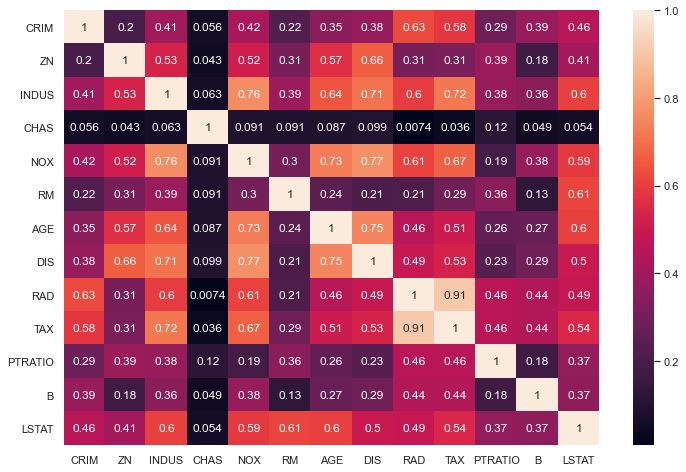

In [4]:
X,y = load_boston(return_X_y=True) 
features = load_boston()['feature_names'] 
df = pd.DataFrame(X,columns=features) 
sns.heatmap(df.corr().abs(),annot=True)

In [5]:
selector = SelectNonCollinear(0.4)

In [6]:
selector.fit(X,y) 
mask = selector.get_support()

<AxesSubplot:>

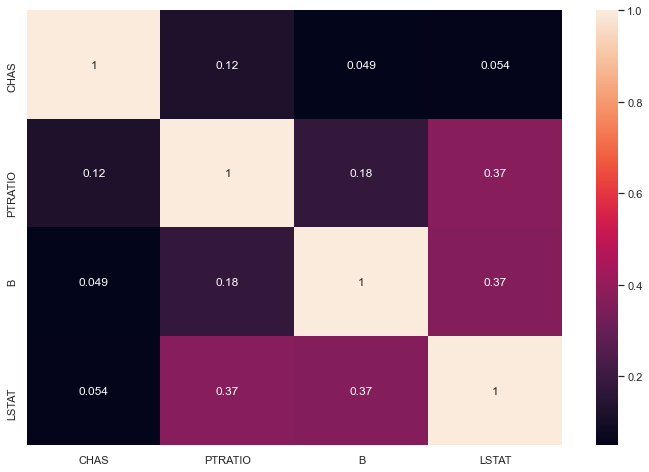

In [7]:
df2 = pd.DataFrame(X[:,mask],columns = np.array(features)[mask]) 
sns.heatmap(df2.corr().abs(),annot=True)

In [8]:
selector = SelectNonCollinear(correlation_threshold=0.4,scoring=f_regression) #utk klasifikasi : f_classif
selector.fit(X,y) 
mask = selector.get_support()

In [9]:
#using pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
pipeline = make_pipeline( SelectNonCollinear(correlation_threshold=0.4,scoring=f_regression), LinearRegression() ) 
pipeline.fit(X,y)

Pipeline(steps=[('selectnoncollinear',
                 <collinearity.SelectNonCollinear.SelectNonCollinear object at 0x0000021C318E0D60>),
                ('linearregression', LinearRegression())])